<a href="https://colab.research.google.com/github/klaltavila/final_project/blob/main/Python_Final_Project_kl3650.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python for Public Policy - Final Project

SIPA - Columbia University

Karina Lages de Altavila Peralta (kl3650)


####**Data Analysis of Tobacco Smoking Trends in the U.S. from 1995 to 2010**

\
**Introduction**

In the mid-1990s, smoking was still widespread in the United States. About one in four adults smoked – 24.7 percent nationwide, and roughly 22 to 23 percent across most states in 1995 (Centers for Disease Control and Prevention [CDC], 1997). Cigarette use has long been tied to severe health and social costs: smoking causes more than 480,000 deaths each year and contributes to disease in over 16 million Americans (CDC, 2024). The economic burden is also striking: more than 600 billion dollars in 2018 alone, including 240 billion dollars in health-care costs and 372 billion dollars in lost productivity (U.S. Department of Health and Human Services, 2022).

Over the last three decades, the United States has relied heavily on public-health campaigns and regulatory measures to reduce smoking. Among the most visible are statewide smoke-free laws, which prohibit smoking in most indoor workplaces and public spaces, usually including restaurants, bars, and government buildings. These laws, first introduced in the late 1990s and early 2000s, differ across states: some are comprehensive, others allow exemptions. Because there is no national smoking ban, these state-level policies offer a useful lens to compare how regulatory choices may relate to long-term behavioral trends.

This paper explores whether states that adopted comprehensive statewide smoking bans experienced greater declines in smoking rates than those without such laws. Specifically, it examines whether (1) the steepest reductions in adult smoking occurred in states with statewide bans, and (2) states lacking these bans saw the smallest declines.

\
**Method**

This paper uses data from the Centers for Disease Control and Prevention (CDC)’s Behavioral Risk Factor Surveillance System (BRFSS) dataset: “BRFSS Prevalence and Trends Data: Tobacco Use – Four Level Smoking Data for 1995–2010,” sourced through the Kaggle platform. It aims to answer the two exploratory questions by comparing the numbers available in the dataset with information on statewide smoking bans across the U.S. The research relies on secondary data collection, gathering information from publicly available sources such as government and health organization websites to identify which states have enacted statewide smoking bans, as well as their context and scope.

The analysis was conducted using Python and several widely used data-analysis libraries. Pandas was applied to clean, organize, and summarize the BRFSS data, including grouping results by year and state to calculate the share of adults who reported smoking every day or on some days between 1995 and 2010. The analysis focused on the “smoke everyday” variable, as it reflects consistent, long-term smoking behavior rather than occasional use. Plotly Express was used to visualize these trends, creating bar and line charts that illustrate changes in smoking prevalence over time and across states. These visualizations help highlight differences in the pace of decline among states. By combining these coded analyses with policy data on statewide smoking bans, the study explores whether declines in smoking rates are associated with the presence or absence of comprehensive smoke-free laws.

\
**Results**

Between 1995 and 2010, the share of adults who smoked every day fell by about seven percentage points, showing a national decline in daily smoking. The states with the largest reductions were Rhode Island, Delaware, Arizona, Connecticut, Massachusetts, New York, North Carolina, Alaska, Texas, and Tennessee. The first six have statewide smoking bans covering workplaces, bars, and restaurants. In contrast, Texas, Alaska, North Carolina, and Tennessee do not have statewide bans, while North Carolina and Tennessee have strong smoke-free laws in effect.

The comparison between states with no smoking bans and those with the smallest declines showed an overlap of four states. Of the ten states with the lowest drops, West Virginia, Oklahoma, Virginia, and Wyoming lacked statewide smoking bans. The observed patterns partially support the paper’s hypotheses: the steepest declines occurred mainly in states with comprehensive bans, while some of the smallest reductions were found in states without such policies. Additionalyl, of the twelve states without any statewide smoking ban, all showed declines below the national average (~7.2%), except for Alaska (8.8%) and Texas (9.4%).


In [1]:
#The following script is adapted from Rachael Krisel’s “Python for Public Policy — Session 2 Workbook”
#(Krisel, 2023): https://colab.research.google.com/github/rskrisel/pandas/blob/main/Pandas_Plotly_Workshop.ipynb


### **Loading Dataset**

**Data citation**
- Centers for Disease Control and Prevention (CDC). Behavioral Risk Factor Surveillance System. Atlanta, Georgia: U.S. Department of Health and Human Services, Centers for Disease Control and Prevention (via The Devastator, Kaggle).

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

tobacco_df = pd.read_csv("/content/drive/MyDrive/Classes/Semester 3/[7-Sat] Python/smoke data/BRFSS_Prevalence_and_Trends_Data__Tobacco_Use_-_Four_Level_Smoking_Data_for_1995-2010.csv")

len(tobacco_df),tobacco_df.head(3)

(876,
    index  Year        State Smoke everyday Smoke some days Former smoker  \
 0      0  1996  Puerto Rico           9.4%            5.1%           16%   
 1      1  1997  Puerto Rico           9.4%              5%         15.7%   
 2      2  1998  Puerto Rico          10.1%            5.2%         16.8%   
 
   Never smoked     Location 1  
 0        69.5%  Puerto Rico\n  
 1        69.9%  Puerto Rico\n  
 2        67.9%  Puerto Rico\n  )

In [ ]:
tobacco_df

,index,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked,Location 1
0,0,1996,Puerto Rico,9.4%,5.1%,16%,69.5%,Puerto Rico\n
1,1,1997,Puerto Rico,9.4%,5%,15.7%,69.9%,Puerto Rico\n
2,2,1998,Puerto Rico,10.1%,5.2%,16.8%,67.9%,Puerto Rico\n
3,3,1999,Puerto Rico,9.7%,4%,15.3%,71%,Puerto Rico\n
4,4,2000,Puerto Rico,9.2%,3.9%,15.2%,71.6%,Puerto Rico\n
...,...,...,...,...,...,...,...,...
871,871,1995,Nationwide (States and DC),19.9%,2.6%,25.3%,51.6%,NaN
872,872,2010,Guam,19.7%,6.1%,16.6%,57.6%,"(13.45, 144.7833)"
873,873,2009,Guam,18.9%,5.2%,11.1%,64.8%,"(13.45, 144.7833)"
874,874,2010,Virgin Islands,3.6%,2.2%,10.5%,83.7%,"(18.3333, -64.8333)"


### **Dataset exploration**

In [ ]:
tobacco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            876 non-null    int64 
 1   Year             876 non-null    int64 
 2   State            876 non-null    object
 3   Smoke everyday   876 non-null    object
 4   Smoke some days  876 non-null    object
 5   Former smoker    876 non-null    object
 6   Never smoked     876 non-null    object
 7   Location 1       839 non-null    object
dtypes: int64(2), object(6)
memory usage: 54.9+ KB


In [ ]:
tobacco_df.sample(10)

,index,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked,Location 1
607,607,2009,Missouri,18.3%,4.8%,24.8%,52.1%,"Missouri\n(38.63578999960896, -92.5663000000448)"
580,580,2008,New York,11.8%,5%,25.4%,57.8%,"New York\n(42.82699999955048, -75.54396999981549)"
444,444,2001,Alaska,19%,7.2%,26.9%,46.9%,"Alaska\n(64.84507999974238, -147.72205999986895)"
91,91,2000,California,12.1%,5.1%,26%,56.7%,"California\n(37.638300000444815, -120.99958999..."
365,365,2002,Georgia,17.7%,5.6%,22.4%,54.3%,"Georgia\n(32.83967999993223, -83.62758000031658)"
226,226,2004,Kentucky,23%,4.5%,20.4%,52.1%,"Kentucky\n(37.645969999815804, -84.77496999996..."
466,466,1997,Virginia,18.8%,5.6%,25.8%,49.8%,"Virginia\n(37.54268000028196, -78.45789000012326)"
339,339,2009,California,8.1%,4.7%,23.2%,63.9%,"California\n(37.638300000444815, -120.99958999..."
375,375,2008,Illinois,15.1%,6.2%,23.4%,55.3%,"Illinois\n(40.485010000411364, -88.99770999971..."
617,617,1996,Illinois,20.4%,4.4%,23.4%,51.8%,"Illinois\n(40.485010000411364, -88.99770999971..."


## **Data Cleaning**

In [ ]:
tobacco_df.dtypes

,0
index,int64
Year,int64
State,object
Smoke everyday,object
Smoke some days,object
Former smoker,object
Never smoked,object
Location 1,object


In [ ]:
tobacco_df.drop(columns=["Location 1"])

,index,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked
0,0,1996,Puerto Rico,9.4%,5.1%,16%,69.5%
1,1,1997,Puerto Rico,9.4%,5%,15.7%,69.9%
2,2,1998,Puerto Rico,10.1%,5.2%,16.8%,67.9%
3,3,1999,Puerto Rico,9.7%,4%,15.3%,71%
4,4,2000,Puerto Rico,9.2%,3.9%,15.2%,71.6%
...,...,...,...,...,...,...,...
871,871,1995,Nationwide (States and DC),19.9%,2.6%,25.3%,51.6%
872,872,2010,Guam,19.7%,6.1%,16.6%,57.6%
873,873,2009,Guam,18.9%,5.2%,11.1%,64.8%
874,874,2010,Virgin Islands,3.6%,2.2%,10.5%,83.7%


In [ ]:
#Convert 'Smoke Everyday' into float64 (numeric)
tobacco_df['Smoke everyday'] = (
    tobacco_df['Smoke everyday']
    .astype(str)
    .str.replace('%', '', regex=False)
)

tobacco_df['Smoke everyday'] = pd.to_numeric(tobacco_df['Smoke everyday'], errors='coerce')

print(tobacco_df['Smoke everyday'].dtype)

float64


### Verifying Duplicates

In [ ]:
#Checking for Duplicates
tobacco_df[tobacco_df.duplicated(keep=False)].head(10)

,index,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked,Location 1


## **Analysis**
### Grouping & Summarizing

##### **Highest Rates**

In [ ]:
#Highest rates in 1995
year1995 = tobacco_df['Year'].min()
tobacco_df_first = tobacco_df[tobacco_df['Year'] == year1995]

highest_1995 = (
    tobacco_df_first.groupby('State')['Smoke everyday']
    .mean()
    .sort_values(ascending=False)
)

print(highest_1995.head(51))

State
Kentucky                                    24.9
Indiana                                     24.3
Tennessee                                   24.2
West Virginia                               23.7
Ohio                                        23.6
Nevada                                      23.3
North Carolina                              23.0
Delaware                                    23.0
Arkansas                                    22.7
Alaska                                      22.3
Maine                                       22.2
Missouri                                    21.9
Alabama                                     21.9
Michigan                                    21.5
Rhode Island                                21.3
Louisiana                                   21.1
South Carolina                              20.9
Mississippi                                 20.5
Pennsylvania                                20.4
Arizona                                     20.3
Florida       

In [ ]:
#'Smoke Everyday' Mean by Year for Each State

trend = (
    tobacco_df.groupby(['State', 'Year'])['Smoke everyday']
    .mean()
    .reset_index()
)

##### **Drop in Rates**

In [ ]:
#Analyzing Drops (1995-2010), highest

rates_1995 = (
    tobacco_df[tobacco_df['Year'] == 1995]
    .groupby('State')['Smoke everyday']
    .mean()
)

rates_2010 = (
    tobacco_df[tobacco_df['Year'] == 2010]
    .groupby('State')['Smoke everyday']
    .mean()
)

drop = rates_1995 - rates_2010
biggest_drops = drop.sort_values(ascending=False)
print(biggest_drops.head(10))

State
Rhode Island      10.4
Delaware          10.2
Arizona            9.6
Connecticut        9.4
Texas              9.4
Alaska             8.8
North Carolina     8.7
Massachusetts      8.6
New York           8.6
Tennessee          8.5
Name: Smoke everyday, dtype: float64


In [ ]:
#Analyzing Drops (1995-2010), lowest

lowest_drops = drop.sort_values(ascending=True).head(10)
print(lowest_drops)

State
West Virginia    0.5
Oklahoma         2.7
Mississippi      3.4
Virginia         4.2
Wyoming          4.2
Hawaii           4.4
Wisconsin        4.6
New Jersey       5.1
California       5.2
Louisiana        5.2
Name: Smoke everyday, dtype: float64


##### **States Without Smoking Bans**

In [ ]:
#No Ban States

noban_states = ["Alaska", "Wyoming", "Texas", "Oklahoma", "Missouri", "Mississipi", "Alabama", "Georgia", "South Carolina", "Kentucky",
                "Virginia", "West Virginia", "Pennsylvania"
]

noban_drops = drop.loc[drop.index.isin(noban_states)]

print(noban_drops)

State
Alabama           6.3
Alaska            8.8
Georgia           5.6
Kentucky          5.6
Missouri          5.3
Oklahoma          2.7
Pennsylvania      7.0
South Carolina    6.9
Texas             9.4
Virginia          4.2
West Virginia     0.5
Wyoming           4.2
Name: Smoke everyday, dtype: float64


In [ ]:
#No Ban vs Lowest Drops
overlap = [state for state in lowest_drops.index if state in noban_states]

print("No-ban states appearing among the lowest 10 drops:")
print(overlap)

No-ban states appearing among the lowest 10 drops:
['West Virginia', 'Oklahoma', 'Virginia', 'Wyoming']


##### **USA Rates**

In [ ]:
#USA Average Drops
us_avg_1995 = rates_1995.mean()
us_avg_2010 = rates_2010.mean()

us_drop = us_avg_1995 - us_avg_2010
print(us_drop)

7.1565826330532225


## **Visuals**
### Plotting the data with pandas

(0.0, 30.0)

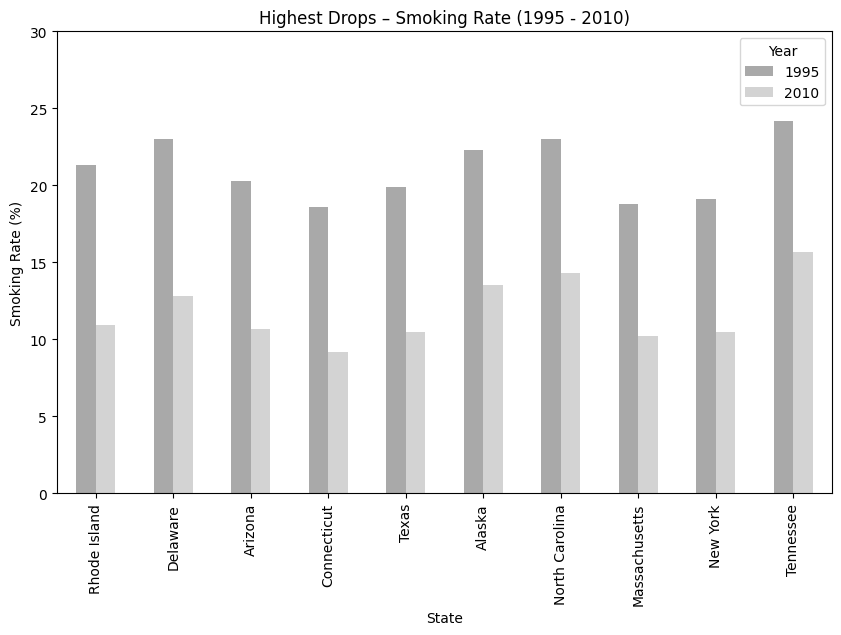

In [ ]:
#1995-2010 Comparison Bar Chart
compare_95_10_df = pd.concat([rates_1995, rates_2010], axis=1)
compare_95_10_df.columns = ['1995', '2010']
compare_95_10_df['Drop'] = compare_95_10_df['1995'] - compare_95_10_df['2010']

top10drops = compare_95_10_df.sort_values('Drop', ascending=False).head(10).reset_index()

ax = top10drops.plot(
    kind='bar',
    x='State',
    y=['1995', '2010'],
    figsize=(10, 6),
    title='Highest Drops – Smoking Rate (1995 - 2010)',
    color=['darkgrey', 'lightgrey']
)

ax.set_xlabel('State')
ax.set_ylabel('Smoking Rate (%)')
ax.legend(title='Year')
ax.set_ylim(0, 30)


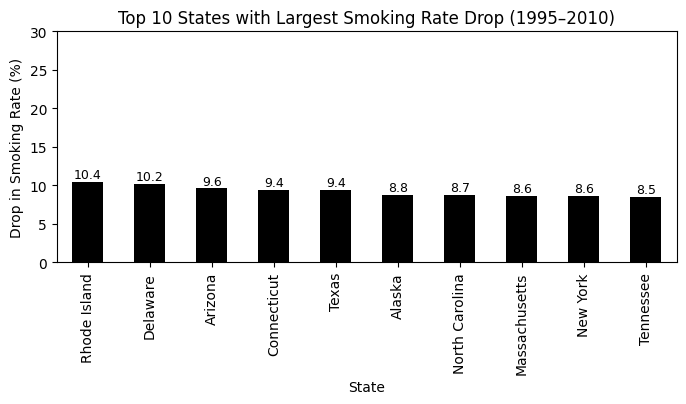

In [ ]:
#Largest Drops Chart
ax = biggest_drops.head(10).plot(
    kind='bar',
    figsize=(8, 3),
    color='black',
    title='Top 10 States with Largest Smoking Rate Drop (1995–2010)'
)

ax.set_xlabel('State')
ax.set_ylabel('Drop in Smoking Rate (%)')
ax.set_ylim(0, 30)

for i, value in enumerate(biggest_drops.head(10)):
    ax.text(i, value + 0.5, f"{value:.1f}", ha='center', fontsize=9)

(0.0, 30.0)

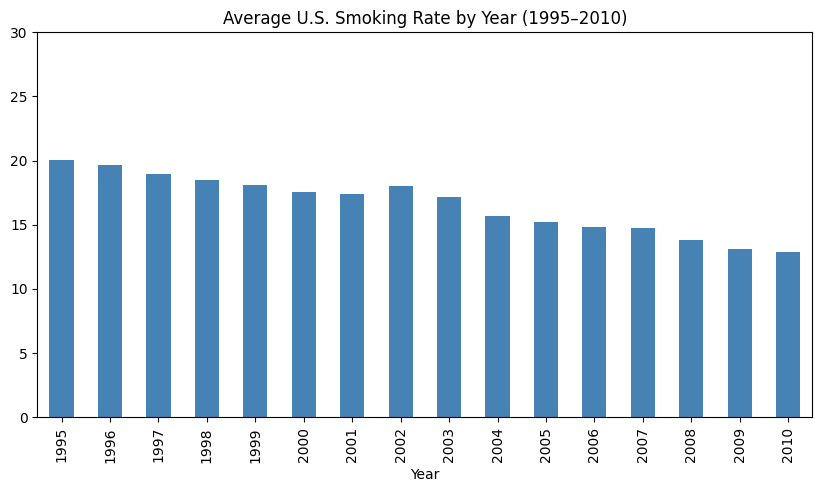

In [ ]:
#USA Drops Chart
us_trend = (
    tobacco_df
    .groupby('Year')['Smoke everyday']
    .mean()
    .reset_index()
)

ax = us_trend.plot(
    x='Year',
    y='Smoke everyday',
    kind='bar',
    color='steelblue',
    figsize=(10,5),
    title='Average U.S. Smoking Rate by Year (1995–2010)',
    legend=False
)

ax.set_ylim(0, 30)


## **Visuals**
### Plotting the data with Plotly Express

In [ ]:
# !pip -q install plotly
import plotly.express as px

In [ ]:
#Highest Drops - Interactive Chart

compare_95_10_df = pd.concat([rates_1995, rates_2010], axis=1)
compare_95_10_df.columns = ['1995', '2010']
compare_95_10_df['Drop'] = compare_95_10_df['1995'] - compare_95_10_df['2010']

top10drops = compare_95_10_df.sort_values('Drop', ascending=False).head(10).reset_index()

top10drops_long = top10drops.melt(id_vars='State', value_vars=['1995','2010'],
                        var_name='Year', value_name='Smoking Rate (%)')

fig = px.bar(top10drops_long, x='State', y='Smoking Rate (%)', color='Year',
             barmode='group',
             title='Highest Drops – Smoking Rate (1995–2010)',
             color_discrete_map={'1995': 'darkgrey', '2010': 'lightgrey'},
             hover_data={'Smoking Rate (%)': ':.1f'})
fig.show()

In [ ]:
#USA Drops - Interactive Chart
us_trend_95_10 = us_trend[(us_trend['Year'] >= 1995) & (us_trend['Year'] <= 2010)]

fig = px.line(
    us_trend_95_10,
    x='Year',
    y='Smoke everyday',
    markers=True,
    title='Average U.S. Smoking Rate by Year (1995–2010)',
    labels={'Smoke everyday': 'Average smoking rate (%)', 'Year': 'Year'},
)

fig.update_traces(hovertemplate='Year=%{x}<br>Smoking rate=%{y:.1f}%')
fig.update_layout(yaxis_tickformat=',.1f')

fig.update_layout(
    yaxis=dict(range=[0, us_trend_95_10['Smoke everyday'].max() + 1]),
    yaxis_tickformat=',.1f'
)

fig.show()

## **Save Artifacts (CSV)**

In [ ]:
tobacco_df.to_csv('tobacco_clean.csv', index=False)

try:
    from google.colab import files
    files.download('tobacco_clean.csv')
except Exception:
    print('File saved to working directory.')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Discussion**

The results indicate an association between the presence of statewide smoking bans and greater reductions in daily smoking rates, suggesting that smoke-free policies may play an important role in reducing smoking prevalence. However, the findings do not establish a direct causal link. Demonstrating causation or statistical correlation would require more advanced methods and additional variables, such as socioeconomic factors, tobacco taxes, education levels, and enforcement intensity. Future research could combine statistical modeling with qualitative studies to explore how these factors interact. For example, some states without statewide bans may still benefit from strong city-level restrictions that influence smoking behavior in ways not captured by state-level data. Expanding the dataset beyond 2010 would also allow researchers to examine whether the downward trend continued and whether more recent restrictions or cultural shifts have strengthened the association between smoke-free policies and long-term declines in smoking.

The use of Python was essential to explore the data effectively. The Pandas tools made it easier to clean the dataset, analyze trends over time, and compare states, while Plotly provided clearer and more detailed visualizations. Lastly, the small rise in national smoking rates between 2001 and 2002 appears to be linked to inconsistencies in data collection that year (Centers for Disease Control and Prevention, 2002).

<br>


**Conclusion**

Overall, the analysis shows that states with comprehensive smoke-free laws have generally achieved greater reductions in daily smoking over time. While this pattern does not prove direct causation, it suggests that statewide smoking bans may be an important component of broader public health strategies to reduce tobacco use. The steady national decline between 1995 and 2010 likely reflects not only policy changes but also cultural shifts, education efforts, and changing social attitudes toward smoking. As smoking continues to decline in most of the country, future research can build on this work by exploring how new local and state measures, combined with national initiatives, continue to shape smoking behavior in the United States.
